
# Program Analisa dan Simulasi Pengujian serta Pemantauan Sumur MIGAS
Program ini adalah sebuah aplikasi berbasis Python yang dirancang untuk menganalisis dan memantau kinerja sumur migas melalui simulasi pengolahan data. Program ini memanfaatkan teknik berpikir komputasional, seperti dekomposisi masalah, pengenalan pola, dan abstraksi, untuk mengelola data sumur, termasuk data tekanan, laju produksi, dan parameter reservoir. Dengan fitur seperti visualisasi grafik, perhitungan parameter teknis seperti permeabilitas dan indeks produktivitas, serta simulasi uji tekanan, program ini membantu pengguna memahami kondisi sumur migas secara mendalam dan memberikan rekomendasi untuk pengelolaan yang lebih baik.

## Anggota Kelompok 7
1. Rifqi Pasha Alviansyah (16424398)
2. Alfredo Jumadi Malau (16424413)
3. M Zefri Alamsyah (16424415)
4. Aruna Rodotuah Girsang (16424425)
5. Muhammad Arif Pratama (16424389)


##### Bagian KAMUS

In [1]:
"""
# KAMUS IDE UTAMA 1
secondary_data = dict  # Menyimpan data sekunder dalam bentuk kamus dengan pasangan kunci-nilai
data_perusahaan = str  # Menyimpan nama perusahaan sebagai string
data_sumur = str  # Menyimpan nama sumur sebagai string
data_lajualir = float  # Menyimpan nilai laju alir fluida dalam satuan bfpd sebagai angka desimal
data_radius = float  # Menyimpan nilai radius sumur dalam satuan feet sebagai angka desimal
data_porositas = float  # Menyimpan nilai porositas sebagai angka desimal
data_ketebalan = float  # Menyimpan nilai ketebalan lapisan produktif dalam satuan feet sebagai angka desimal
data_viskositas = float  # Menyimpan nilai viskositas dalam satuan cp sebagai angka desimal
data_kompresibilitas = float  # Menyimpan nilai kompresibilitas dalam satuan (1/psi) sebagai angka desimal
data_faktorvolumeformasi = float  # Menyimpan nilai faktor volume formasi dalam satuan (bbl/STD) sebagai angka desimal

# KAMUS IDE UTAMA 2
data_produksi_sumur = str  # Menyimpan nama file Excel yang berisi data produksi sumur (sebagai string)
df = pd.DataFrame  # Menyimpan data yang dibaca dari file Excel dalam bentuk DataFrame
data_array_produksisumur = np.ndarray  # Menyimpan data produksi sumur dalam bentuk array NumPy
data_sumur = str  # Menyimpan nama sumur sebagai string (untuk digunakan di grafik atau laporan)
Tanggal = pd.Series  # Menyimpan kolom tanggal dari file Excel sebagai series (data bertipe tanggal)
BFPD = pd.Series  # Menyimpan kolom BFPD (Barel Fluid Per Day) dari file Excel sebagai series
BOPD = pd.Series  # Menyimpan kolom BOPD (Barel Oil Per Day) dari file Excel sebagai series
plt = matplotlib.pyplot  # Pustaka matplotlib untuk plotting grafik
Exception = type  # Tipe data untuk menangani kesalahan (error) yang terjadi dalam proses
e = Exception  # Menyimpan objek exception yang berisi informasi kesalahan (error)
data_slope = float  # Nilai slope (m) dalam satuan (psi/cycle)
data_p1hour = float  # Nilai P pada 1 jam dalam satuan psi
data_pwst0 = float  # Nilai Pws pada dt = 0 dalam satuan psi
data_tekananreservoir0 = float  # Nilai Tekanan statik reservoir mula-mula dalam psi

# KAMUS IDE UTAMA 3
data_permiabilitas = float  # Nilai permabilitas dalam satuan mD
data_skin = float  # Nilai skin sumur
data_dpskin = float  # Nilai penurunan tekanan pada daerah skin

# KAMUS IDE UTAMA 4
data_piaktual = float  # Nilai produktivitas indeks aktual (bfpd/psi)
data_piideal = float  # Nilai produktivitas indeks ideal (bfpd/psi)
data_fe = float  # Nilai efisiensi aliran (FE)

# KAMUS IDE UTAMA 5
data_lajumax1 = float  # Nilai laju alir maksimal (bfpd/psi)
data_laju2 = float  # Nilai laju alir aktual (bfpd/psi)
data_array_1 = list  # Array yang menyimpan data dari input pengguna (Pwf)
data_array_2 = list  # Array yang menyimpan data hasil perhitungan (Q aktual)
data_array_3 = list  # Array yang menyimpan data hasil perhitungan (Q maksimal)
"""


'\n# KAMUS IDE UTAMA 1\nsecondary_data = dict  # Menyimpan data sekunder dalam bentuk kamus dengan pasangan kunci-nilai\ndata_perusahaan = str  # Menyimpan nama perusahaan sebagai string\ndata_sumur = str  # Menyimpan nama sumur sebagai string\ndata_lajualir = float  # Menyimpan nilai laju alir fluida dalam satuan bfpd sebagai angka desimal\ndata_radius = float  # Menyimpan nilai radius sumur dalam satuan feet sebagai angka desimal\ndata_porositas = float  # Menyimpan nilai porositas sebagai angka desimal\ndata_ketebalan = float  # Menyimpan nilai ketebalan lapisan produktif dalam satuan feet sebagai angka desimal\ndata_viskositas = float  # Menyimpan nilai viskositas dalam satuan cp sebagai angka desimal\ndata_kompresibilitas = float  # Menyimpan nilai kompresibilitas dalam satuan (1/psi) sebagai angka desimal\ndata_faktorvolumeformasi = float  # Menyimpan nilai faktor volume formasi dalam satuan (bbl/STD) sebagai angka desimal\n\n# KAMUS IDE UTAMA 2\ndata_produksi_sumur = str  # Meny


## Ide Utama 1 : Proses Data Sekunder dan Parameter Sumur
Data Sekunder adalah data-data tentang sumur, dapat diperoleh pada file perusahaan yang telah terseia, meliputi data produksi (laju alir fluida, radius sumur) dandata teknik reservoir porositas, ketebalan lapisan produktif, viskositas, kompresibilitas, dan faktor volume formasi.

In [2]:
# Program Awalan
print("\nSelamat Datang di Program Analisis dan Simulasi Uji Potensi Sumur Karya Kelompok 7 Kelas 24 Compthink\n")
print("Mohon untuk mengisi data sekunder untuk analisis lebih lanjut:")
print("Keterangan: Data sekunder diperoleh dari data perusahaan")

# Input Data Sekunder Sumur
data_perusahaan = input("Masukkan nama perusahaan: ")
data_sumur = input("Masukkan nama sumur: ")
data_lajualir = float(input("Masukkan nilai laju alir fluida (Q) dalam satuan bfpd: "))
data_radius = float(input("Masukkan nilai radius sumur (rw) dalam satuan feet: "))
data_porositas = float(input("Masukkan nilai porositas (Q*): "))
data_ketebalan = float(input("Masukkan nilai ketebalan lapisan produktif (h) dalam satuan feet: "))
data_viskositas = float(input("Masukkan nilai viskositas (cp) dalam satuan cp: "))
data_kompresibilitas = float(input("Masukkan nilai kompresibilitas (ct) dalam satuan (1/psi): "))
data_faktorvolumeformasi = float(input("Masukkan nilai faktor volume formasi (Bo) dalam satuan (bbl/STD): "))

secondary_data = {
    "Nama Perusahaan": data_perusahaan,
    "Nama Sumur": data_sumur,
    "Laju Alir Fluida (BPD)": data_lajualir,
    "Radius Sumur (ft)": data_radius,
    "Porositas": data_porositas,
    "Ketebalan Reservoir (ft)": data_ketebalan,
    "Viscositas (cp)": data_viskositas,
    "Kompresibilitas (1/psi)": data_kompresibilitas,
    "Nilai Faktor Volume Formasi (bbl/STB)": data_faktorvolumeformasi
    }

print("")
print("====================================")
print(f"\nData Sekunder Sumur {data_sumur} : \n")
for key, value in secondary_data.items():
    print(f"{key}: {value}")
print("====================================")


Selamat Datang di Program Analisis dan Simulasi Uji Potensi Sumur Karya Kelompok 7 Kelas 24 Compthink

Mohon untuk mengisi data sekunder untuk analisis lebih lanjut:
Keterangan: Data sekunder diperoleh dari data perusahaan


Data Sekunder Sumur KF EKSPEDISI : 

Nama Perusahaan: PT Pertamina
Nama Sumur: KF EKSPEDISI
Laju Alir Fluida (BPD): 59.357
Radius Sumur (ft): 0.35
Porositas: 0.2416
Ketebalan Reservoir (ft): 19.6848
Viscositas (cp): 1.147
Kompresibilitas (1/psi): 3.25e-06
Nilai Faktor Volume Formasi (bbl/STB): 1.2322


## Ide Utama 2 : Proses Data Produksi Sumur 
Sebelum dilakukan pengujian sumur, perlu dilakukan analisis terlebih dahulu data produksi selama beberapa periode sebelumnya, untuk mengukur apakah perlu dilakukan pengujian sumur lebih lanjut atau tidak. Indikasi perlunya dilakukan pengujian sumur lebih lanjut adalah jika di temukan tren penurunan laju produksi sumur tersebut.

Sedang memproses data file Excel....
Array Data Produksi Sumur:
[['01 Januari ' 75.87 17.64]
 ['04 Januari ' 80.76 18.47]
 ['07 Januari ' 80.56 18.37]
 ['10 Januari ' 80.76 18.45]
 ['13 Januari ' 88.56 19.65]
 ['16 Januari ' 97.63 21.0]
 ['19 Januari ' 95.56 20.68]
 ['22 Januari ' 97.78 21.02]
 ['15 Januari ' 115.65 23.78]
 ['28 Januari ' 123.56 25.0]
 ['31 Januari ' 115.73 23.79]
 ['3 Februari ' 117.53 24.09]
 ['6 Februari ' 97.65 21.0]
 ['9 Februari ' 95.32 20.64]
 ['12 Februari ' 87.65 19.46]
 ['15 Februari ' 86.56 19.29]
 ['18 Februari ' 86.63 19.3]
 ['21 Februari ' 87.63 19.0]
 ['24 Februari ' 86.63 17.45]
 ['27 Februari ' 87.63 17.43]
 ['2 Maret ' 80.86 15.02]
 ['5 Maret ' 76.84 14.86]
 ['8 Maret ' 71.75 15.76]
 ['11 Maret ' 68.86 15.23]
 ['13 Maret ' 66.86 15.76]
 ['16 Maret ' 66.7 15.02]
 ['19 Maret ' 64.64 14.86]
 ['22 Maret ' 58.86 14.23]
 ['25 Maret ' 53.97 12.72]
 ['28 Maret ' 49.75 11.64]]


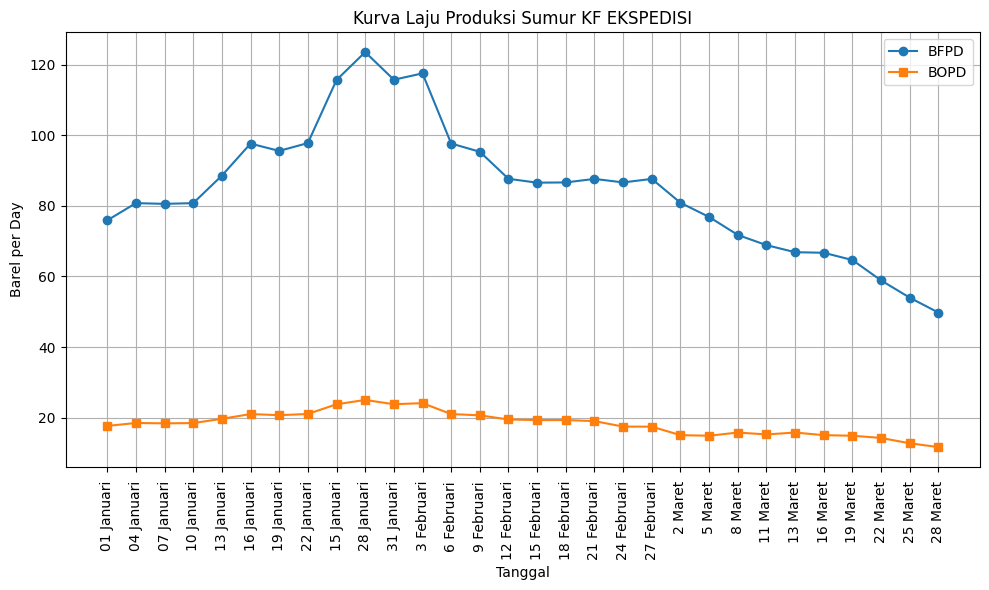

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membuat Sub program untuk membaca file excel yang berisikan data produksi sumur
def process_excel_file():
    try:
        data_produksi_sumur = "data laju produksi sumur.xlsx" 
        # Excel ini berisi data waktu dan Produksi Sumur, data produksi sumur meliputi BOPD (Barel Oil Per Day) dan BFPD (Barel Fluid Per Day)

        # Aksi membaca excel
        df = pd.read_excel(data_produksi_sumur)

        # Membuat array berdasarkan data excel yang telah di baca
        data_array_produksisumur = df.to_numpy()
        print("Array Data Produksi Sumur:")
        print(data_array_produksisumur)

        # Plotting data array menjadi sebuat grafik produksi terhadap waktu
        if 'Tanggal' in df.columns and 'BFPD' in df.columns and 'BOPD' in df.columns:
            
            # Aksi untuk plotting menggunakan bantuan pustaka matplotlib.pyplot
            df['Tanggal'] = pd.Categorical(df['Tanggal'], categories=df['Tanggal'], ordered=True)
            plt.figure(figsize=(10, 6))
            plt.plot(df['Tanggal'], df['BFPD'], label='BFPD', marker='o')
            plt.plot(df['Tanggal'], df['BOPD'], label='BOPD', marker='s')
            plt.title(f"Kurva Laju Produksi Sumur {data_sumur}")
            plt.xlabel('Tanggal')
            plt.ylabel('Barel per Day')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
        else:
            print("Kolom 'Tanggal', 'BFPD', dan 'BOPD' tidak bisa di plotting. Mohon untuk memperbaiki file Excel tersebut.")

    except Exception as e:
        print("Terjadi kesalahan saat membaca file Excel", e)

# Sub program utama
def main():
    print("Sedang memproses data file Excel....")
    process_excel_file()

main()

## Ide Utama 3 : Proses Analisa Tekanan Dasar Sumur


Selamat datang di Program Bagian Analisa Tekanan Dasar Sumur KF EKSPEDISI

Sedang memproses data Excel.....

Berikut adalah hasil visualisasi data tekanan dasar sumur....


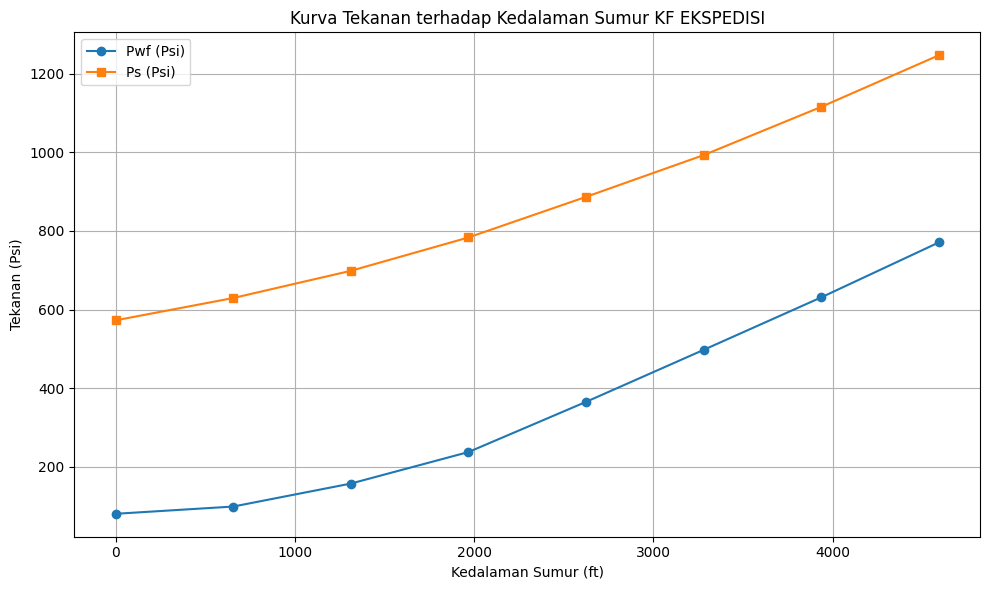

In [4]:
# Input Data Primer - Hasil Pengukuran Dasar Sumur
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membuat sub program untuk membaca data excel
def process_excel_file():
    try:
        data_primer = "data pressure sumur.xlsx"
        # Excel yang dimaksud adalah data primer hasil pengukuran di lapangaan berkaitan dengan pressure tiap kedalaman sumur

        # Aksi
        dg = pd.read_excel(data_primer)
        data_array = dg.to_numpy()

        # Plot data ke dalam grafik kedalaman terhadap presuree
        if 'Kedalaman Sumur (ft)' in dg.columns and 'Pwf (Psi)' in dg.columns and 'Ps (Psi)' in dg.columns:
            plt.figure(figsize=(10, 6))
            plt.plot(dg['Kedalaman Sumur (ft)'], dg['Pwf (Psi)'], label='Pwf (Psi)', marker='o')
            plt.plot(dg['Kedalaman Sumur (ft)'], dg['Ps (Psi)'], label='Ps (Psi)', marker='s')
            plt.title(f"Kurva Tekanan terhadap Kedalaman Sumur {data_sumur}")
            plt.xlabel('Kedalaman Sumur (ft)')
            plt.ylabel('Tekanan (Psi)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print("Kolom 'Kedalaman Sumur (ft)', 'Pwf (Psi)', and 'Ps (Psi)' tidak bisa di plotting. Mohon untuk memperbaiki file Excel tersebut ")

    except Exception as e:
        print("Terjadi kesalahan saat membaca file Excel:", e)

# Fungsi utama
def main():
    print(f"\nSelamat datang di Program Bagian Analisa Tekanan Dasar Sumur {data_sumur}")
    print("\nSedang memproses data Excel.....")
    print("\nBerikut adalah hasil visualisasi data tekanan dasar sumur....")
    process_excel_file()
main()


##### Bagian Perhitungan : Tekanan Alir di Puncak Perforasi (Pwf) dan Tekanan Statik di Puncak Perforasi (Ps)

In [5]:
# Membaca data excel tekanan dan kedalaman (data primer)
data_primer = "data pressure sumur.xlsx"
dg = pd.read_excel(data_primer)
data_array = dg.to_numpy()

# Mencari nilai kedalaman maksimum dalam satuan feet
max_depth_row = data_array[data_array[:, 1].argmax()] 
max_depth = max_depth_row[1]
specific_value = max_depth_row[2]  # Mengambil elemen di baris pertama, kolom indeks 2

# Menuliskan kedalaman maksimum
print(f"\nKedalaman maksimum di data: {max_depth} m")
print(f"Array yang bersangkutan adalah: {max_depth_row}")

# Input data zona perforasi dan calling data di atas
print(f"\nBatas bawah zona perforasi: {specific_value} ft")
batas_atasm = float(input("Batas atas zona perforasi (meter): "))
mid_batasatasm = max_depth + (batas_atasm - max_depth)
batas_atasf = mid_batasatasm * 3.2808 #convert satuan ke feet
print(f"Batas atas zona perforasi: {batas_atasf}")

# Menghitung Tekanan alir di puncak perforasi (Pwf)
data_pwf = ((batas_atasf - specific_value) * 0.2130 ) + max_depth_row[3]

# Menghitung Tekanan statik di puncak perforasi (Ps)
data_ps = ((batas_atasf - specific_value) * 0.2001 ) + max_depth_row[4]


# Output
print()
print(f"Tekanan aliran dasar sumur pada zona perforasi (Pwf) adalah {data_pwf} psi")
print(f"Tekanan statik dasar sumur pada zona perforasi (Ps) adalah {data_ps} psi")



Kedalaman maksimum di data: 1400.0 m
Array yang bersangkutan adalah: [   8.   1400.   4593.12  770.87 1247.09  198.76]

Batas bawah zona perforasi: 4593.12 ft
Batas atas zona perforasi: 4734.1944

Tekanan aliran dasar sumur pada zona perforasi (Pwf) adalah 800.9188472000001 psi
Tekanan statik dasar sumur pada zona perforasi (Ps) adalah 1275.31898744 psi


## Ide Utama 4 : Proses Analisa Pressure Build Up Test


In [6]:
# Memasukan data tambahan yang diperlukan untuk analisa lebih lanjut
data_slope = float(input("Masukkan nilai slope (m) dalam satuan (psi/cycle) : "))
data_p1hour = float(input("Masukkan nilai P 1 hour dalam satuan psi : "))
data_pwst0 = float(input("Masukkan nilai Pws pada dt = 0 dalam satuan psi : "))
data_tekananreservoir0 = float(input("Masukkan nilai Tekanan statik reservoir mula-mula : "))

# Menampilkan semua data yang diperlukan sebelum melakukan perhitungan dan analisis
print(f"Nama Sumur : {data_sumur}")
print(f"Slope (m) : {data_slope}")
print(f"Tekanan 1 jam (P1hour): {data_p1hour}")
print(f"Pws pada dt = 0 : {data_pwst0}")

Nama Sumur : KF EKSPEDISI
Slope (m) : 130.0
Tekanan 1 jam (P1hour): 1115.0
Pws pada dt = 0 : 195.12


##### Perhitungan Permiabilitas, Skin, dan Tekanan di daerah skin

In [7]:
import math

# Menghitung Permiabilitas
data_permiabilitas = (162.6 * data_lajualir * data_viskositas * data_faktorvolumeformasi) / (data_slope * data_ketebalan)

# Menghitung Skin
penyebutlog = data_porositas * data_viskositas * data_kompresibilitas * data_radius * data_radius
pecahanlog = data_permiabilitas / penyebutlog
nilailog = math.log10(pecahanlog)
pecahan_pertama = (data_p1hour - data_pwst0) / data_slope
data_skin = 1.151 * (pecahan_pertama - nilailog + 3.23)

# Menghitung Penurunan Tekanan pada Daerah Skin
data_dpskin = 0.87 * data_slope * data_skin

# Output
print(f"Nilai Permiabilitas (k) : {data_permiabilitas:.6f} mD")
print(f"Nilai Skin (S) : {data_skin:.6f} ")
print(f"Nilai dP Skin (dPskin) : {data_dpskin:.6f} psi")

Nilai Permiabilitas (k) : 5.330436 mD
Nilai Skin (S) : 3.017827 
Nilai dP Skin (dPskin) : 341.316180 psi


## Ide Utama 5 : Proses Analisa Kondisi Produktivitas Sumur

##### Bagian Perhitungan : Laju Produktivitas Indeks

In [8]:
# Menghitung Produktivitas Indeks Aktual
data_piaktual = data_lajualir / (data_tekananreservoir0 - data_pwf)


# Menghitung Produktivitas Indeks Ideal
data_piideal = data_lajualir / (data_tekananreservoir0 - data_pwf - data_dpskin)


# Menghitung Nilai Efisiensi Aliran (FE)
data_fe = data_piaktual / data_piideal


# Output
print(f"Nilai Indeks Produktivtas Aktual : {data_piaktual:.6f} bfpd/psi")
print(f"Nilai Indeks Produktivitas Ideal : {data_piideal:.6f} bfpd/psi ")
print(f"Nilai Flow Efficiency (FE) : {data_fe:.6f} ")


Nilai Indeks Produktivtas Aktual : 0.078196 bfpd/psi
Nilai Indeks Produktivitas Ideal : 0.142082 bfpd/psi 
Nilai Flow Efficiency (FE) : 0.550356 


##### Bagian Perhitungan : Laju Maksimal dan Laju Aktual


In [9]:
# Perhitungan
data_lajumax1 = data_lajualir / (1 - 0.2 * (1 - data_fe * (1 - (data_pwf / data_ps))) - 0.8 * ((1 - data_fe * (1 - (data_pwf / data_ps))) ** 2))

data_laju2 = data_lajumax1 * (1 - 0.2 * (1 - data_fe * (1 - ( 0 / data_ps))) - 0.8 * ((1 - data_fe * (1 - ( 0 / data_ps))) ** 2))

# Output
print(f"Nilai Laju alir maksimal (FE = 1) : {data_lajumax1:.6f} bfpd/psi")
print(f"Nilai Laju alir aktual (FE = {data_fe:.3f}) : {data_laju2:.6f} bfpd/psi ")


Nilai Laju alir maksimal (FE = 1) : 177.198622 bfpd/psi
Nilai Laju alir aktual (FE = 0.550) : 132.602610 bfpd/psi 


##### Bagian Visualisasi : Grafik Inflow Performance Relationship (IPR)

Masukkan 6 data nilai:

Data Array 1 (Pwf): [1275.31898744, 1020.255189952, 765.1913924639999, 510.127594976, 255.063797488, 0.0]
Data Array 2 (Q aktual): [0.0, 26.520521952810288, 53.041043905620576, 79.56156585843085, 106.08208781124115, 132.60260976405144]
Data Array 3 (Q maksimal): [0.0, 35.43972430461031, 70.87944860922062, 106.31917291383093, 141.75889721844123, 177.19862152305154]


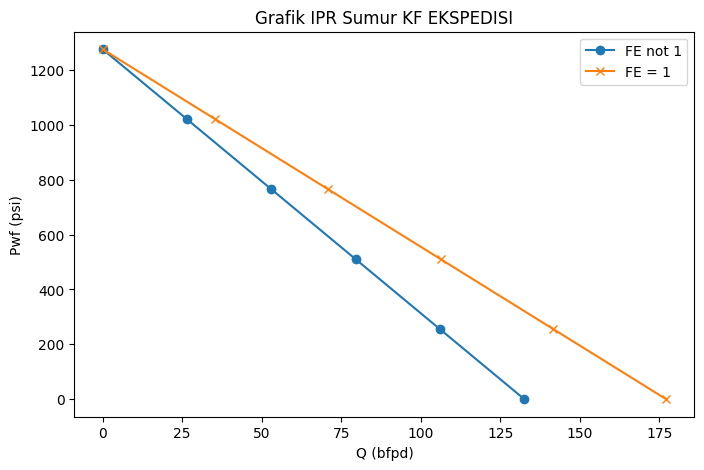

In [10]:
import matplotlib.pyplot as plt

# Fungsi untuk memasukkan data dari user
def input_data():
    data = []
    for i in range(6):  # Masukkan 6 data
        value = float(input(f"Masukkan nilai ke-{i+1}: "))
        data.append(value)
    return data

print("Masukkan 6 data nilai:")

# Proses array
data_array_1 = input_data()

data_array_2 = []
for x in data_array_1:
    data_array_2.append(x * float(data_laju2))

data_array_3 = []
for x in data_array_1:
    data_array_3.append(x * float(data_lajumax1))

data_array_1 = [x * float(data_ps) for x in data_array_1]
data_array_1 = data_array_1[::-1]

# Menampilkan data array 1 dan array 2
print("\nData Array 1 (Pwf):", data_array_1)
print("Data Array 2 (Q aktual):", data_array_2)
print("Data Array 3 (Q maksimal):", data_array_3)

# Plotting grafik
plt.figure(figsize=(8, 5))

# Kurva 1: Data array 1 (Pwf) vs data array 2 (Q aktual)
plt.plot(data_array_2, data_array_1, label='FE not 1', marker='o')

# Kurva 2: Data array 1 (Pwf) vs data array 3 (Q maksimal)
plt.plot(data_array_3, data_array_1, label='FE = 1', marker='x')

# Menambahkan label dan judul
plt.ylabel('Pwf (psi)')
plt.xlabel('Q (bfpd)')
plt.title(f"Grafik IPR Sumur {data_sumur}")
plt.legend()

# Menampilkan grafik
plt.show()


## Ide Utama 6 : Proses Pemaparan Hasil Analisis dan Kesimpulan

In [11]:
# Menampilkan semua data keseluruhan yang diperlukan sebelum melakukan perhitungan dan analisis
print(f"Nama Sumur : {data_sumur}")
print("==========ANALISIS TEKANAN DASAR SUMUR=========")
print(f"Tekanan aliran dasar sumur pada zona perforasi (Pwf) : {data_pwf}")
print(f"Tekanan statik dasar sumur pada zona perforasi (PS) : {data_ps}")
print(f"Tekanan statik reservoir mula-mula (P*) : {data_tekananreservoir0}")
print(f"Slope (m) : {data_slope}")
print(f"Tekanan 1 jam (P1hour): {data_p1hour}")
print(f"Pws pada dt = 0 : {data_pwst0}")
print(" ==========ANALISIS BUILDUP TEST=========")
print(f"Nilai Permiabilitas (k) : {data_permiabilitas} mD")
print(f"Nilai Skin (S) : {data_skin} ")
print(f"Nilai dP Skin (dPskin) : {data_dpskin} psi")
print("==========================================")
print(f"Nilai Indeks Produktivtas Aktual : {data_piaktual:.6f} bfpd/psi")
print(f"Nilai Indeks Produktivitas Ideal : {data_piideal:.6f} bfpd/psi ")
print(f"Nilai Flow Efficiency (FE) : {data_fe:.6f} ")
print("==========================================")
print(f"Nilai Laju alir maksimal (FE = 1) : {data_lajumax1:.6f} bfpd/psi")
print(f"Nilai Laju alir aktual (FE = {data_fe:.3f}) : {data_laju2:.6f} bfpd/psi ")
print("\n======================================\n")


Nama Sumur : KF EKSPEDISI
==========ANALISIS TEKANAN DASAR SUMUR=========
Tekanan aliran dasar sumur pada zona perforasi (Pwf) : 800.9188472000001
Tekanan statik dasar sumur pada zona perforasi (PS) : 1275.31898744
Tekanan statik reservoir mula-mula (P*) : 1560.0
Slope (m) : 130.0
Tekanan 1 jam (P1hour): 1115.0
Pws pada dt = 0 : 195.12
 ==========ANALISIS BUILDUP TEST=========
Nilai Permiabilitas (k) : 5.330436173881088 mD
Nilai Skin (S) : 3.0178265245635627 
Nilai dP Skin (dPskin) : 341.3161799281389 psi
Nilai Indeks Produktivtas Aktual : 0.078196 bfpd/psi
Nilai Indeks Produktivitas Ideal : 0.142082 bfpd/psi 
Nilai Flow Efficiency (FE) : 0.550356 
Nilai Laju alir maksimal (FE = 1) : 177.198622 bfpd/psi
Nilai Laju alir aktual (FE = 0.550) : 132.602610 bfpd/psi 




In [12]:

# Pilihan menu kesimpulan
print("\nPilihan Menu Kesimpulan Berdasarkan Hasil Simulasi dan Analisis:")
print("1. Kesimpulan Analisis Tekanan Dasar Sumur")
print("2. Kesimpulan Analisis Pressure Buid Test")
print("3. Kesimpulan Analisis Produktivitas Sumur")
print("4. Rekomendasi")
print("5. Keluar")
print("\n===================HASIL=====================")

while True:
    pilihan_kesimpulan = int(input("Masukkan menu kesimpulan: "))

    # Kesimpulan 1 - Tekanan Dasar Sumur
    if pilihan_kesimpulan == 1:
        print(f"1. Pada zona perforasi sumur {data_sumur} di kedalaman {max_depth} - {batas_atasm} meter memiliki tekanan dasar statik "
              f"sebesar {data_ps:.3f} psi dan tekanan dasar aliran dasar sumur sebesar {data_pwf:.3f} psi.")

    # Kesimpulan 2 - Pressure Buildup Test
    elif pilihan_kesimpulan == 2:
        print(f"2. Dari analisa pressure buildup test dengan metode Horner sumur {data_sumur}, pada kurva antara tekanan penutupan "
              f"sumur terhadap waktu Horner didapatkan tekanan statik awal reservoir {data_pwst0} psi. ")
        
        if data_skin > 0:
            print(f"Kondisi formasi disekitar lubang sumur {data_sumur} terindikasi telah mengalami kerusakan formasi (formation damage). "
                  f"Hal ini dapat dilihat dari hasil analisa skin (faktor kerusakan) sebesar {data_skin} dan effisiensi aliran "
                  f"(FE) dibawah kondisi normal sebesar {data_fe}.")
        elif data_skin == 0:
            print(f"Kondisi formasi disekitar lubang sumur {data_sumur} terindikasi normal. "
                  f"Hal ini dapat dilihat dari hasil analisa skin (faktor kerusakan) sebesar {data_skin} dan effisiensi aliran "
                  f"(FE) sebesar {data_fe}.")
        else:
            print(f"Kondisi formasi disekitar lubang sumur {data_sumur} terindikasi telah mengalami perbaikan formasi. "
                  f"Hal ini dapat dilihat dari hasil analisa skin (faktor kerusakan) sebesar {data_skin} dan effisiensi aliran "
                  f"(FE) sebesar {data_fe}.")

    # Kesimpulan 3 - Produktivitas Sumur
    elif pilihan_kesimpulan == 3:
        print(f"3. Produktivitas sumur {data_sumur} memiliki laju alir fluida produksi aktual sebesar {data_laju2} bfpd (FE = {data_fe}) "
              f"sedangkan sumur tersebut pada kondisi normal (FE = 1) dapat menghasilkan laju alir produksi maksimal sebesar "
              f"{data_lajumax1} bfpd. Maka formasi disekitar lubang sumur {data_sumur} telah mengalami kerusakan formasi (formation damage).")

    # Rekomendasi
    elif pilihan_kesimpulan == 4:
        print("\nRekomendasi berdasarkan analisis:")
        # Misalkan rekomendasi yang dapat ditampilkan
        if data_skin > 0:
            print("1. Diperlukan perbaikan formasi untuk meningkatkan laju alir fluida.")
            print("2. Pengecekan lebih lanjut pada k1ondisi formasi untuk memperbaiki kerusakan.")
            print("3. Perlu diberikan tekanan tambahan pada sumur.")
        else:
            print("Sumur dalam keadaan potimal tidak perlu tindakan lebih lanjut. GOOD JOOB")

    # Keluar dari perulangan
    elif pilihan_kesimpulan == 5:
        print("\nTerima kasih telah menggunakan program kami. ttd Lord Recta @2024")
        break
    else:
        print("\nPilihan tidak valid, silakan coba lagi.")



Pilihan Menu Kesimpulan Berdasarkan Hasil Simulasi dan Analisis:
1. Kesimpulan Analisis Tekanan Dasar Sumur
2. Kesimpulan Analisis Pressure Buid Test
3. Kesimpulan Analisis Produktivitas Sumur
4. Rekomendasi
5. Keluar

===================HASIL=====================
1. Pada zona perforasi sumur KF EKSPEDISI di kedalaman 1400.0 - 1443.0 meter memiliki tekanan dasar statik sebesar 1275.319 psi dan tekanan dasar aliran dasar sumur sebesar 800.919 psi.
2. Dari analisa pressure buildup test dengan metode Horner sumur KF EKSPEDISI, pada kurva antara tekanan penutupan sumur terhadap waktu Horner didapatkan tekanan statik awal reservoir 195.12 psi. 
Kondisi formasi disekitar lubang sumur KF EKSPEDISI terindikasi telah mengalami kerusakan formasi (formation damage). Hal ini dapat dilihat dari hasil analisa skin (faktor kerusakan) sebesar 3.0178265245635627 dan effisiensi aliran (FE) dibawah kondisi normal sebesar 0.5503561395653993.
3. Produktivitas sumur KF EKSPEDISI memiliki laju alir fluida p